Python Imports

In [64]:
from netCDF4 import Dataset
import numpy as np
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import matplotlib.pyplot as plt

Pre Defined Stuff

In [148]:
# Date Stuff
syr=2009
eyr=2009
nyr=eyr-syr+1
nmpyr=12
ndaypyr=366

# lats/lons
nx=144
ny=73

# day of year for JAS
sdy=182-1
edy=273-1
ndays=edy-sdy
print(ndays)

# AtlanticNa Region [230E-350E; 30N-70N]
region=[230,350,30,90]

# Isopleths
ispoleth=5700

91


Read NCEP/NCAR 500 hPa daily data for 2009

In [234]:
inPath='/shared/ccsm4/kpegion/obs2/NCEPR1/hgt'

for iyr in range(syr,eyr+1):
    inFile='%s/hgt.%s.nc' %(inPath,iyr)
    print(inFile)
    ncfile=Dataset(inFile,'r')
    
    # If its the first year, get the lon, lat, level information
    if iyr == syr:
       lat = ncfile.variables['lat'][:]
       ny=len(lat)
       lat=np.flip(lat)
       lon = ncfile.variables['lon'][:]
       nx=len(lon)
       levs = np.array(ncfile.variables['level'][:])
       plev=np.where(levs==500)[0]
       nctime = ncfile.variables['time'][:]
       nt=len(nctime)   
      
       # Read Z500 JAS
       z500JAS = ncfile.variables['hgt'][sdy:edy,plev,:,:]
       z500JAS=np.squeeze(np.flip(z500JAS,axis=2))
       print(z500JAS.shape)

/shared/ccsm4/kpegion/obs2/NCEPR1/hgt/hgt.2009.nc
(91, 73, 144)


Extract AtlanticNA Region

In [235]:
# Get Lon/Lat info
latli = np.argmin( np.abs( lat - region[2] ) )
latui = np.argmin( np.abs( lat - region[3] ) )
lonli = np.argmin( np.abs( lon - region[0] ) )
lonui = np.argmin( np.abs( lon - region[1] ) )

nxreg=lonui-lonli+1
nyreg=latui-latli+1
nxnyreg=nxreg*nyreg

latsReg=lat[latli:latui+1]
lonsReg=lon[lonli:lonui+1]
nxReg=lonsReg.size
nyReg=latsReg.size
print(nxReg, nyReg)

# Extract the data for this region
REG=z500JAS[:,latli:latui+1,lonli:lonui+1]


49 25


Make a plot of the region for Aug 29, 2009 -- should match Barnes 2013 Figure 1b

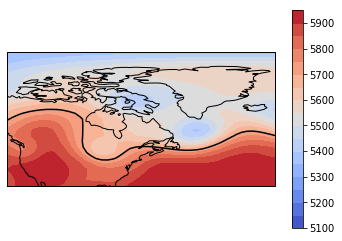

In [236]:
ax=plt.axes(projection=ccrs.PlateCarree())
clevs = np.arange(5100,6000,50)
#x=np.ones((nyReg,nxReg))*REG[0,:,np.newaxis]
#datacyc,loncyc=add_cyclic_point(REG[0,:,:],coord=lonsReg)
contour=ax.contourf(lonsReg, latsReg, REG[59,:,:],levels=clevs,cmap=plt.cm.coolwarm, transform = ccrs.PlateCarree())
ax.coastlines()
plt.colorbar(contour)
contourlines=ax.contour(lonsReg, latsReg, REG[59,:,:],levels=[5700],transform=ccrs.PlateCarree(),colors='black')
plt.show()

Find the maximum latitude and minimium latitude of the 5700m Z500 JAS isopleth for lon=302 (Barnes 2013, Figure 1a)

<ErrorbarContainer object of 3 artists>

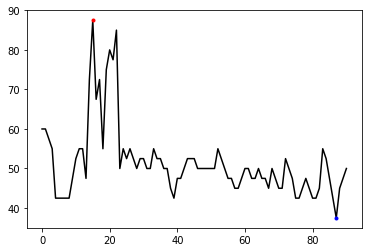

In [237]:
i=29 # Lon 302.5
isoplethLat=np.zeros((ndays,1))
for it in range(0,ndays):
    tmp=np.argmin(np.abs(REG[it,:,i]-isopleth))
    isoplethLat[it]=latsReg[tmp]

plt.plot(np.arange(ndays),isoplethLat,color='black')
maxLatLoc=np.argmax(isoplethLat)
minLatLoc=np.argmin(isoplethLat)

plt.errorbar(maxLatLoc,isoplethLat[maxLatLoc],ecolor='orange',fmt='.',color='red')
plt.errorbar(minLatLoc,isoplethLat[minLatLoc],ecolor='orange',fmt='.',color='blue')        